In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Read in our ramen data
stroke_df = pd.read_csv("../Stroke-Prediction-Analysis/healthcare-dataset-stroke-data.csv")
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
# Print out the Country value counts
work_type_counts = stroke_df.work_type.value_counts()
work_type_counts

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:ylabel='Density'>

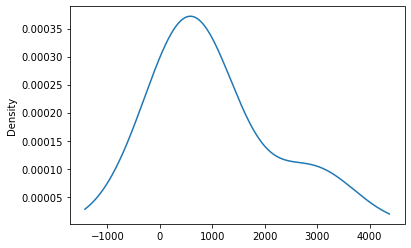

In [3]:
# Visualize the value counts
work_type_counts.plot.density()

In [4]:
# Determine which values to replace
replace_work_type = list(work_type_counts[work_type_counts < 100].index)

# Replace in DataFrame
for work_type in replace_work_type:
    stroke_df.work_type = stroke_df.work_type.replace(work_type,"Other")
    
    # Check to make sure binning was successful
stroke_df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Other              22
Name: work_type, dtype: int64

In [5]:
# Generate our categorical variable lists
stroke_df_cat = stroke_df.dtypes[stroke_df.dtypes == "object"].index.tolist()

In [6]:
# Check the number of unique values in each column
stroke_df[stroke_df_cat].nunique()

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(stroke_df[stroke_df_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(stroke_df_cat)
encode_df.head()

/Users/bradroberts/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Other,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# Merge one-hot encoded features and drop the originals
stroke_df = stroke_df.merge(encode_df,left_index=True, right_index=True)
stroke_df = stroke_df.drop(stroke_df_cat,1)
stroke_df.head()

/Users/bradroberts/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Other,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,NaN,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# Split our preprocessed data into our features and target arrays
y = stroke_df["stroke"].values
X = stroke_df.drop(["id", "stroke"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/bradroberts/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 176       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


2022-05-14 12:11:16.410178: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

2022-05-14 12:11:56.324757: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
120/120 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.9146
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9484
Epoch 3/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9572
Epoch 4/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9547
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.9490
Epoch 6/100
120/120 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9551
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.9483
Epoch 8/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9562
Epoch 9/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9558
Epoch 10/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9541
Epoch 11/100
120/12

120/120 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.9554
Epoch 84/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9519
Epoch 85/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9585
Epoch 86/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9541
Epoch 87/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9554
Epoch 88/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9502
Epoch 89/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9492
Epoch 90/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9512
Epoch 91/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9483
Epoch 92/100
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9525
Epoch 93/100
120/120 [=

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: nan - accuracy: 0.9468
Loss: nan, Accuracy: 0.9467918872833252
